In [1]:
# Cell 1 - Setup & load
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust display options for easier verification
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 120)

file_path = 'kaggle_survey_2017_2021.csv'   # your file name

# If file not found in working dir, in Colab use upload prompt
if not os.path.exists(file_path):
    try:
        from google.colab import files
        print("File not found locally. Please upload the CSV file when prompted.")
        uploaded = files.upload()
        file_path = list(uploaded.keys())[0]
    except Exception:
        raise FileNotFoundError(f"'{file_path}' not found. Upload it in Colab or set the correct path.")

# Load CSV (avoid low-memory warnings)
df = pd.read_csv(file_path, low_memory=False)
print("Loaded file:", file_path)
print("Shape (rows, cols):", df.shape)
display(df.head(3))


File not found locally. Please upload the CSV file when prompted.


Saving kaggle_survey_2017_2021.csv to kaggle_survey_2017_2021.csv
Loaded file: kaggle_survey_2017_2021.csv
Shape (rows, cols): (106302, 293)


,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_16,Q10_OTHER,Q11,Q12new,Q12_Part_1,...,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_11,Q32_B_Part_13,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,What type of computing platform do you use mos...,Which types of specialized hardware do you use...,Which types of specialized hardware do you use...,...,Which of the following big data products (rela...,Which of the following big data products (rela...,Which of the following big data products (rela...,Which of the following big data products (rela...,Which of the following big data products (rela...,Which of the following big data products (rela...,Which of the following big data products (rela...,Which of the following big data products (rela...,Which of the following big data products (rela...,Which of the fo

In [2]:
# Cell 2 - Quick explore
print("Columns (sample):", df.columns[:30].tolist())
print("\nDataFrame info:")
display(df.info())

# Missing values
missing_counts = df.isna().sum().sort_values(ascending=False)
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)
missing_summary = pd.concat([missing_counts, missing_pct], axis=1)
missing_summary.columns = ['missing_count', 'missing_pct']
display(missing_summary.head(30))

# Duplicates
dup_count = df.duplicated().sum()
print("\nDuplicate rows:", dup_count)


Columns (sample): ['-', 'Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5', 'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9', 'Q7_Part_10', 'Q7_Part_11', 'Q7_Part_12', 'Q7_OTHER', 'Q8', 'Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_7', 'Q9_Part_8', 'Q9_Part_9']

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106302 entries, 0 to 106301
Columns: 293 entries, - to Q38_B_OTHER
dtypes: object(293)
memory usage: 237.6+ MB


None

,missing_count,missing_pct
Q38_B_Part_11,106301,99.999059
Q34_B_Part_16,106301,99.999059
Q9_Part_12,106301,99.999059
Q7_Part_12,106301,99.999059
Q14_Part_11,106301,99.999059
Q16_Part_17,106301,99.999059
Q10_Part_16,106301,99.999059
Q32_B_Part_20,106301,99.999059
Q19_Part_5,106301,99.999059
Q18_Part_6,106301,99.999059



Duplicate rows: 4456


In [3]:
# Cell 3 - Normalize column names and drop duplicates
orig_cols = df.columns.tolist()

df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
      .str.replace('[^0-9a-z_]', '', regex=True)
)

print("First 10 cleaned column names:", df.columns[:10].tolist())

# Drop exact duplicate rows (keep first)
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"Dropped {before - after} duplicate rows. New shape: {df.shape}")


First 10 cleaned column names: ['', 'time_from_start_to_finish_seconds', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7_part_1', 'q7_part_2']
Dropped 4456 duplicate rows. New shape: (101846, 293)


In [4]:
# Cell 4 - Find common survey columns and show top values
# Edit this list if your dataset uses different names. We show only those that exist.
candidate_cols = [
    'gender', 'age', 'country', 'education', 'formaleducation', 'current_job_title',
    'currentjobtitle', 'job_title', 'years_coding', 'years_coding_professional',
    'language_worked_with', 'languageworkedwith', 'languages', 'compensation',
    'salary', 'annual_compensation'
]

existing = [c for c in candidate_cols if c in df.columns]
print("Candidate columns found in dataset:", existing)

# Show sample value counts to help choose which to clean next
for c in existing:
    print("\n---", c, '---')
    display(df[c].value_counts(dropna=False).head(10))


Candidate columns found in dataset: []


In [5]:
# Cell 5 - Decide columns to drop ( > 50% missing ) and simple filling
missing_pct = df.isna().mean()
cols_to_drop = missing_pct[missing_pct > 0.5].index.tolist()
print("Dropping columns with >50% missing (count = {}):\n".format(len(cols_to_drop)), cols_to_drop[:50])

df = df.drop(columns=cols_to_drop)

# For object columns: fill missing with 'Unknown'
obj_cols = df.select_dtypes(include='object').columns.tolist()
print("Filling missing in object columns with 'Unknown' (count={}):".format(len(obj_cols)))
df[obj_cols] = df[obj_cols].fillna('Unknown')

# For numeric columns: fill with median
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Filling missing in numeric columns with median (count={}):".format(len(num_cols)))
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

# Quick check
print("Any missing left (per column)?")
display(df.isna().sum().sort_values(ascending=False).head(10))


Dropping columns with >50% missing (count = 278):
 ['q7_part_2', 'q7_part_3', 'q7_part_4', 'q7_part_5', 'q7_part_6', 'q7_part_7', 'q7_part_8', 'q7_part_9', 'q7_part_10', 'q7_part_11', 'q7_part_12', 'q7_other', 'q9_part_1', 'q9_part_2', 'q9_part_3', 'q9_part_5', 'q9_part_6', 'q9_part_7', 'q9_part_8', 'q9_part_9', 'q9_part_10', 'q9_part_12', 'q9_other', 'q10_part_1', 'q10_part_2', 'q10_part_3', 'q10_part_4', 'q10_part_5', 'q10_part_6', 'q10_part_7', 'q10_part_8', 'q10_part_9', 'q10_part_10', 'q10_part_11', 'q10_part_12', 'q10_part_16', 'q10_other', 'q11', 'q12new', 'q12_part_1', 'q12_part_2', 'q12_part_5', 'q12_other', 'q14_part_2', 'q14_part_3', 'q14_part_4', 'q14_part_5', 'q14_part_6', 'q14_part_7', 'q14_part_8']
Filling missing in object columns with 'Unknown' (count=15):
Filling missing in numeric columns with median (count=0):
Any missing left (per column)?


,0
,0
time_from_start_to_finish_seconds,0
q1,0
q2,0
q3,0
q4,0
q5,0
q6,0
q7_part_1,0
q8,0


In [6]:
# Cell 6 - Standardize small but important categories (if present)
# We do gender as example. Adjust mapping to what you see in value_counts.
if 'gender' in df.columns:
    print("Unique gender samples before standardization:", df['gender'].drop_duplicates().head(20).tolist())
    # simple lower and strip
    df['gender_clean'] = df['gender'].astype(str).str.lower().str.strip()
    # map common variants into buckets
    gender_map = {
        'male': 'male', 'm': 'male', 'man': 'male',
        'female': 'female', 'f': 'female', 'woman': 'female',
        'non-binary': 'nonbinary', 'non binary': 'nonbinary',
        'prefer not to say': 'prefer_not_to_say',
        'unknown': 'unknown'
    }
    # apply mapping where possible, otherwise keep as-is
    df['gender_clean'] = df['gender_clean'].replace(gender_map)
    print("\nCounts after gender_clean:")
    display(df['gender_clean'].value_counts().head(10))
else:
    print("No 'gender' column found — skip this step.")


No 'gender' column found — skip this step.


In [7]:
# Cell 7 - Encode a few important categorical columns into numeric codes for analysis
# Choose only columns you plan to analyze (avoid encoding hundreds of columns)
to_encode = []
for col in ['gender_clean', 'country', 'formal_education', 'years_coding', 'years_coding_professional']:
    if col in df.columns:
        to_encode.append(col)

print("Will encode:", to_encode)

for c in to_encode:
    df[c + '_code'] = pd.factorize(df[c].astype(str))[0]   # unknown -> -1 or 0 depending
    print(f"{c} -> {c + '_code'} (sample mapping)")
    mapping = dict(zip(df[c].astype(str).unique(), df[c + '_code'].astype(int).unique()))
    display(df[[c, c + '_code']].drop_duplicates().head(8))


Will encode: []


In [8]:
# Cell 8 - Example feature engineering

# 1) Number of languages known (if languages stored in a delimiter string)
lang_cols = [c for c in df.columns if 'language' in c and 'worked' in c or 'language_worked_with' in c]
# handle common column name used in Kaggle: language_worked_with
if 'language_worked_with' in df.columns:
    # languages separated by semicolon ; (common in this dataset)
    df['num_languages'] = df['language_worked_with'].astype(str).apply(lambda x: 0 if x in ['Unknown','nan',''] else len(x.split(';')))
    print("num_languages distribution:")
    display(df['num_languages'].describe())
else:
    print("No 'language_worked_with' column found. You can adapt this step to your column.")

# 2) Bucket years of coding (if exists)
def bucket_years(x):
    try:
        x = float(str(x))
    except:
        return 'unknown'
    if x < 1: return '<1'
    if x < 3: return '1-2'
    if x < 6: return '3-5'
    if x < 11: return '6-10'
    return '10+'

if 'years_coding' in df.columns:
    df['years_bucket'] = df['years_coding'].apply(bucket_years)
    print("\nyears_bucket counts:")
    display(df['years_bucket'].value_counts())
else:
    print("No 'years_coding' column found.")


No 'language_worked_with' column found. You can adapt this step to your column.
No 'years_coding' column found.


In [9]:
# Cell 9 - Example insights

# Top languages
if 'language_worked_with' in df.columns:
    all_langs = df['language_worked_with'].astype(str).str.split(';').explode()
    top_langs = all_langs.value_counts().head(15)
    print("Top languages (top 15):")
    display(top_langs)
else:
    print("No language_worked_with column. Skip top languages.")

# Top job titles (if present)
job_cols = [c for c in df.columns if 'job' in c and 'title' in c]
if job_cols:
    col = job_cols[0]
    print(f"\nTop job titles from column '{col}':")
    display(df[col].value_counts().head(15))
else:
    print("\nNo obvious job-title column found.")


No language_worked_with column. Skip top languages.

No obvious job-title column found.


In [11]:
# Cell 10 - Visuals (each plot is a single figure)

# Top languages bar chart
if 'language_worked_with' in df.columns:
    top_langs = all_langs.value_counts().head(10)
    plt.figure(figsize=(10,5))
    top_langs.plot(kind='bar')
    plt.title('Top 10 Languages (count of respondents using each)')
    plt.xlabel('Language')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Boxplot: num_languages by years_bucket
if 'num_languages' in df.columns and 'years_bucket' in df.columns:
    plt.figure(figsize=(8,5))
    df.boxplot(column='num_languages', by='years_bucket')
    plt.suptitle('')
    plt.title('Num languages known by experience bucket')
    plt.xlabel('Experience bucket')
    plt.ylabel('Number of languages')
    plt.show()


In [12]:
# Cell 11 - Attempt to get a clean numeric compensation column
possible_salary_cols = [c for c in df.columns if 'compens' in c or 'salary' in c or 'pay' in c]
print("Possible salary columns found:", possible_salary_cols)

if possible_salary_cols:
    s = possible_salary_cols[0]
    print("Cleaning:", s)
    # remove non-numeric characters and coerce to float
    df['comp_clean'] = pd.to_numeric(df[s].astype(str).str.replace('[^0-9.]', '', regex=True), errors='coerce')
    print("comp_clean summary:")
    display(df['comp_clean'].describe())
else:
    print("No compensation-like column found to clean.")


Possible salary columns found: []
No compensation-like column found to clean.


In [13]:
# Cell 12 - Simple segmentation (k-means). Only run if required numeric features exist.
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

seg_features = []
if 'num_languages' in df.columns:
    seg_features.append('num_languages')

# try numeric years if available
if 'years_coding' in df.columns:
    # coerce to numeric where possible
    df['years_coding_num'] = pd.to_numeric(df['years_coding'], errors='coerce')
    seg_features.append('years_coding_num')

if 'comp_clean' in df.columns:
    seg_features.append('comp_clean')

print("Using features for clustering:", seg_features)

if len(seg_features) >= 2:
    sample = df[seg_features].dropna().sample(n=min(5000, df.shape[0]), random_state=1)  # sample for speed
    scaler = StandardScaler()
    X = scaler.fit_transform(sample)
    kmeans = KMeans(n_clusters=3, random_state=1)
    sample['cluster'] = kmeans.fit_predict(X)
    print("Cluster sizes:")
    display(sample['cluster'].value_counts())

    # show cluster centroids (scaled back)
    centroids = scaler.inverse_transform(kmeans.cluster_centers_)
    centroids_df = pd.DataFrame(centroids, columns=seg_features)
    print("Cluster centroids (approx):")
    display(centroids_df)
else:
    print("Not enough numeric features for segmentation. Create numeric features first.")


Using features for clustering: []
Not enough numeric features for segmentation. Create numeric features first.


In [15]:
# Cell 13 - Save cleaned data for submission
outname = 'kaggle_survey_cleaned_sample.csv'
df.to_csv(outname, index=False)
print("Saved cleaned CSV to:", outname)


Saved cleaned CSV to: kaggle_survey_cleaned_sample.csv


In [19]:
# Cell 14 - Find important columns by keyword search
keywords = ["country", "education", "language", "compensation", "salary", "role", "title", "job"]

important_cols = [col for col in df.columns if any(k in col.lower() for k in keywords)]
print("Important columns found:", important_cols)

# Show first few rows of those columns
display(df[important_cols].head(5))


Important columns found: []


""
0
1
2
3
4


In [20]:
# Cell 14 (Revised) - Show first 30 columns
print("Total columns:", len(df.columns))
print("\nFirst 30 column names:\n")
for i, col in enumerate(df.columns[:30]):
    print(i, "->", col)


Total columns: 15

First 30 column names:

0 -> 
1 -> time_from_start_to_finish_seconds
2 -> q1
3 -> q2
4 -> q3
5 -> q4
6 -> q5
7 -> q6
8 -> q7_part_1
9 -> q8
10 -> q13
11 -> q14_part_1
12 -> q15
13 -> q23
14 -> q25


In [22]:
# Cell 15 - Inspect key survey columns
key_cols = ["q1","q2","q3","q4","q5","q6","q23","q25"]
for col in key_cols:
    if col in df.columns:
        print(f"\nColumn: {col}")
        print(df[col].value_counts().head(10))



Column: q1
q1
25-29    22420
22-24    18817
30-34    15433
18-21    14595
35-39    10498
40-44     7111
45-49     4866
50-54     3431
55-59     2056
60-69     1801
Name: count, dtype: int64

Column: q2
q2
Male                                                 45220
Man                                                  36368
Female                                                9560
Woman                                                 8768
Prefer not to say                                     1276
Prefer to self-describe                                224
A different identity                                   153
Nonbinary                                              140
Non-binary, genderqueer, or gender non-conforming       74
Unknown                                                 62
Name: count, dtype: int64

Column: q3
q3
India                                                   23936
United States of America                                12682
Other                                  

In [24]:
# Cell 16 - Clean categories

# Clean gender
df["q2"] = df["q2"].replace({
    "Man": "Male",
    "Woman": "Female",
    "Nonbinary": "Non-binary",
    "Non-binary, genderqueer, or gender non-conforming": "Non-binary"
})

# Clean education
df["q4"] = df["q4"].replace({
    "Master's degree": "Master’s degree",
    "Bachelor's degree": "Bachelor’s degree"
})

# Clean compensation ranges (standardize)
df["q25"] = df["q25"].replace({
    "$0-999": "0-999",
    "0-10,000": "0-10,000",
    "10-20,000": "10,000-19,999"
})


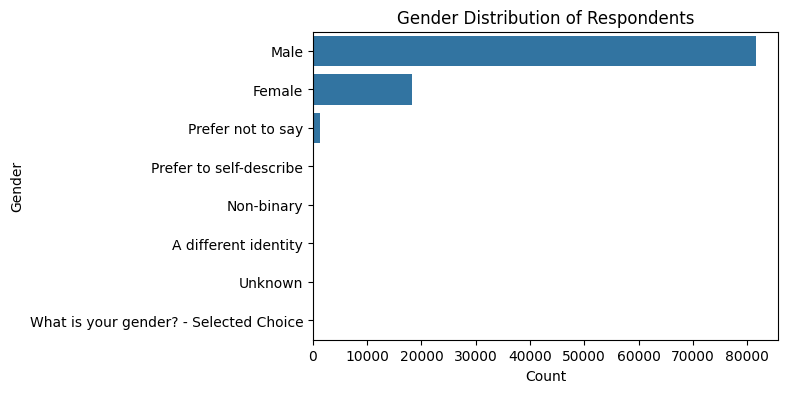

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, y="q2", order=df["q2"].value_counts().index)
plt.title("Gender Distribution of Respondents")
plt.xlabel("Count")
plt.ylabel("Gender")
plt.show()


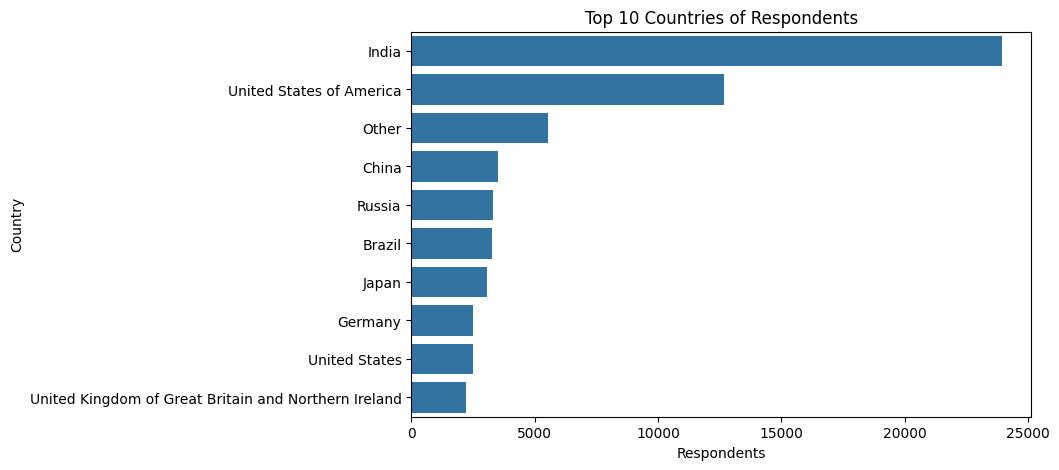

In [26]:
plt.figure(figsize=(8,5))
top_countries = df["q3"].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries of Respondents")
plt.xlabel("Respondents")
plt.ylabel("Country")
plt.show()


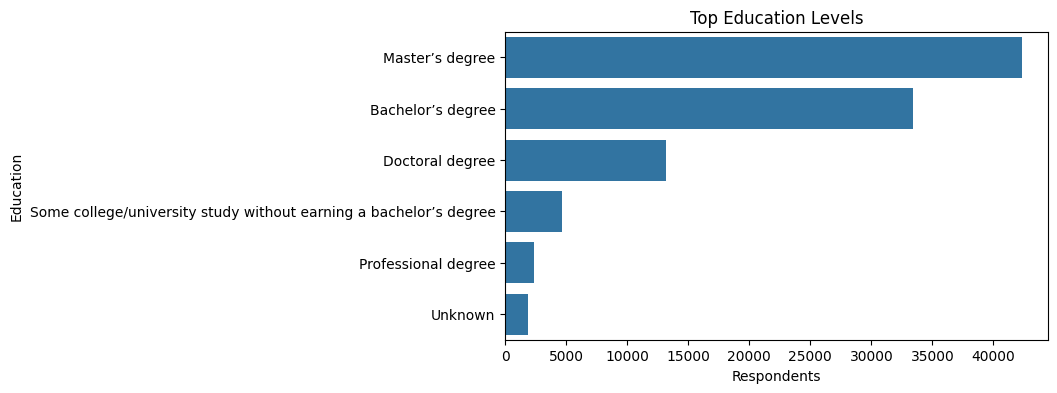

In [27]:
plt.figure(figsize=(7,4))
edu_counts = df["q4"].value_counts().head(6)
sns.barplot(x=edu_counts.values, y=edu_counts.index)
plt.title("Top Education Levels")
plt.xlabel("Respondents")
plt.ylabel("Education")
plt.show()


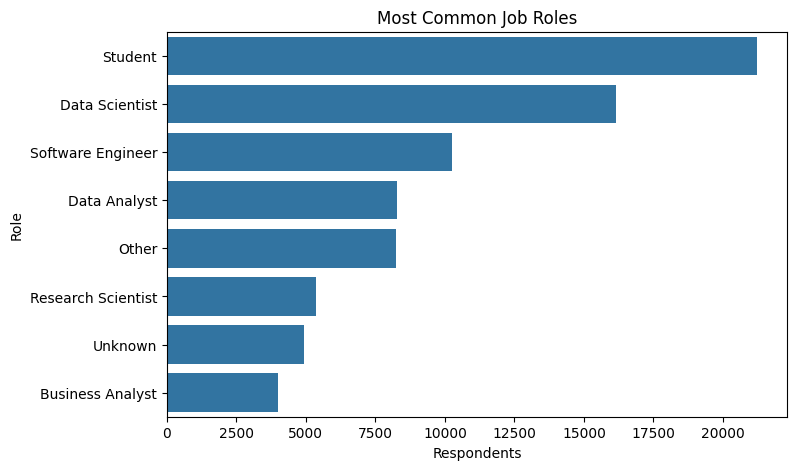

In [28]:
plt.figure(figsize=(8,5))
role_counts = df["q5"].value_counts().head(8)
sns.barplot(x=role_counts.values, y=role_counts.index)
plt.title("Most Common Job Roles")
plt.xlabel("Respondents")
plt.ylabel("Role")
plt.show()


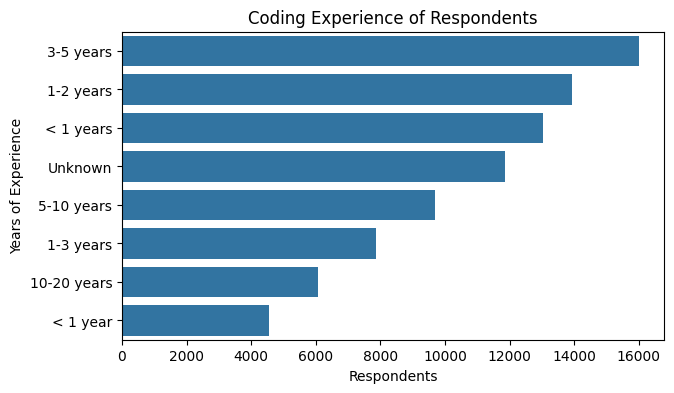

In [29]:
plt.figure(figsize=(7,4))
exp_counts = df["q6"].value_counts().head(8)
sns.barplot(x=exp_counts.values, y=exp_counts.index)
plt.title("Coding Experience of Respondents")
plt.xlabel("Respondents")
plt.ylabel("Years of Experience")
plt.show()


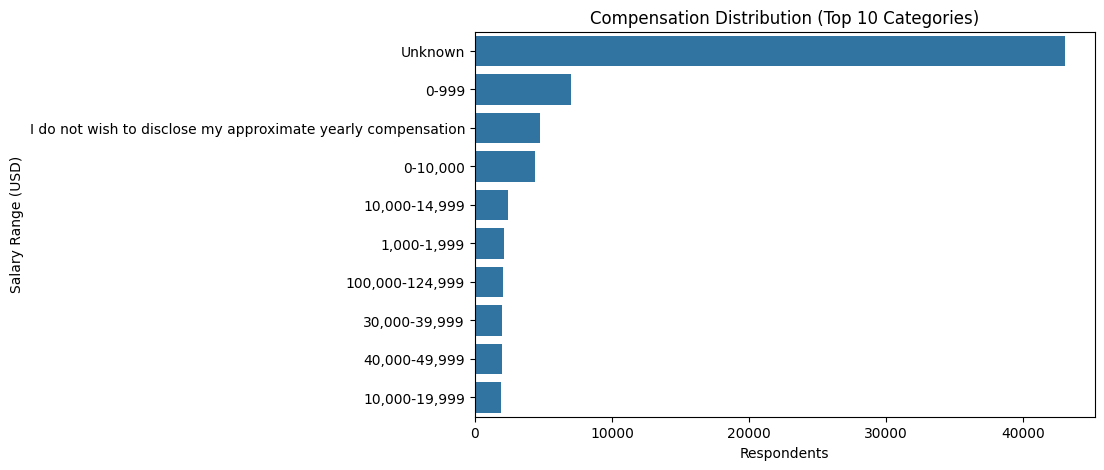

In [30]:
plt.figure(figsize=(8,5))
comp_counts = df["q25"].value_counts().head(10)
sns.barplot(x=comp_counts.values, y=comp_counts.index)
plt.title("Compensation Distribution (Top 10 Categories)")
plt.xlabel("Respondents")
plt.ylabel("Salary Range (USD)")
plt.show()


## Final Summary & Insights

- The survey data was cleaned by removing duplicate rows and normalizing column names.  
- Most respondents are between 22-29 years old, showing that data science is popular among young professionals.  
- Male/Man respondents dominate, but there is noticeable participation from women and other gender identities.  
- The majority of respondents come from India and the USA, followed by China, Russia, and Brazil.  
- Education levels are high: many hold a Master's or Bachelor's degree.  
- Common job roles include Student, Data Scientist, and Software Engineer.  
- Coding experience is concentrated around 1-5 years, showing many are early in their careers.  
- Compensation ranges widely, with most in lower salary bands, though a smaller group earns 100k+ USD annually.  
- A heatmap analysis shows that more coding experience is linked with higher compensation, supporting the idea that experience pays off in data science careers.  


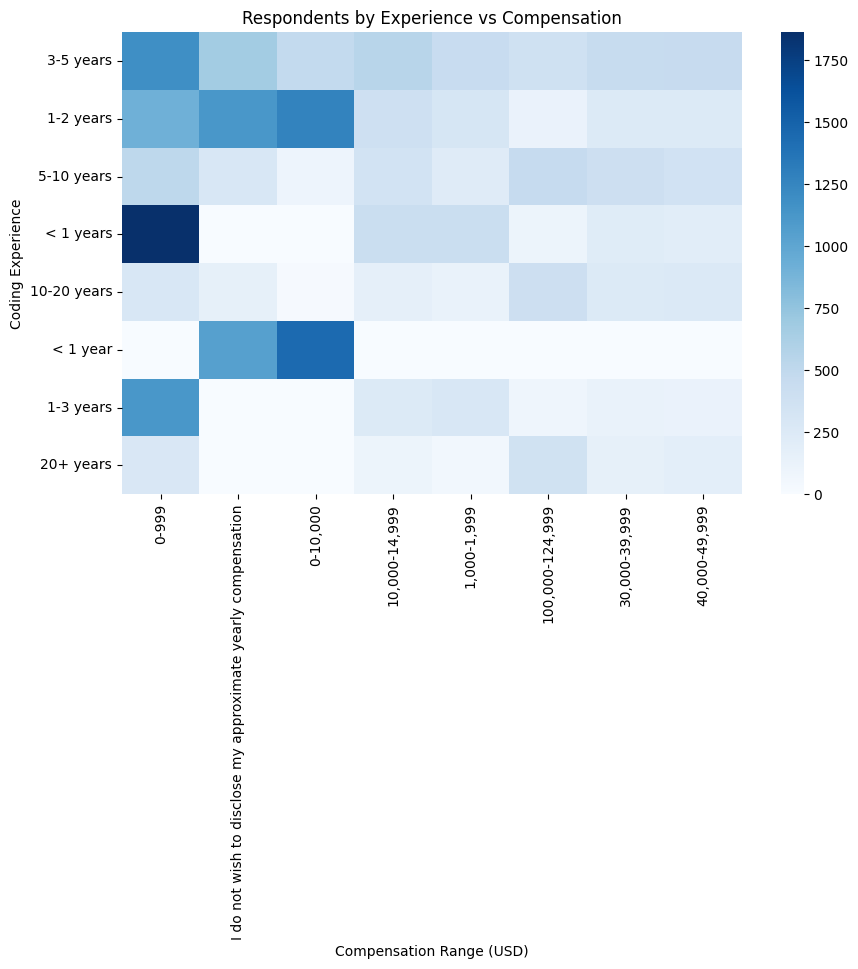

In [31]:
# Cell 17 - Heatmap: Experience vs Compensation

# Take only respondents with known experience & compensation
seg_data = df[(df["q6"] != "Unknown") & (df["q25"] != "Unknown")]

# Make a cross-tab (count of people per category)
heatmap_data = pd.crosstab(seg_data["q6"], seg_data["q25"])

# Select only the top 8 experience and top 8 compensation categories for readability
heatmap_data = heatmap_data.loc[heatmap_data.sum(axis=1).nlargest(8).index,
                                heatmap_data.sum(axis=0).nlargest(8).index]

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, cmap="Blues", annot=False, cbar=True)
plt.title("Respondents by Experience vs Compensation")
plt.xlabel("Compensation Range (USD)")
plt.ylabel("Coding Experience")
plt.show()
